In [1]:
import os
import re
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
from skimage.color import rgb2lab, lab2rgb
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# New Section

In [2]:
def sorting_data(data):
    con = lambda text: int(text) if text.isdigit() else text.lower()
    num_key = lambda key: [con(c) for c in re.split('([0-9]+)',key) ]
    return sorted(data, key = num_key)

In [3]:
#transform  them into an array
size = 160
img_c = []
path = '/kaggle/input/landcolor/landscape Images'
path_2 = '/kaggle/input/landscape/landscape Images/color'
path_3 = '/kaggle/input/landscape/landscape Images/gray'
files = os.listdir(path_2)
files = sorting_data(files)
files_1 = os.listdir(path_3)
files_1 = sorting_data(files_1)

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
train = train_datagen.flow_from_directory(path,
                                          target_size=(160, 160),
                                          batch_size = 5000,
                                          class_mode = None)

Found 7129 images belonging to 1 classes.


In [6]:
#transform  them into an array
X =[]
Y =[]
for i in tqdm(train[0]):
  try:
      lab = rgb2lab(i)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128)
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))

100%|██████████| 5000/5000 [00:14<00:00, 341.86it/s]


In [7]:
#Array representation of images
print(X.shape)

(5000, 160, 160, 1)


In [8]:
print(Y.shape)

(5000, 160, 160, 2)


In [9]:
#output
Y[1]

array([[[ 0.02265861,  0.13696635],
        [ 0.02246315,  0.13665421],
        [ 0.02445548,  0.12739156],
        ...,
        [-0.00476732, -0.03264919],
        [-0.00476697, -0.03271438],
        [-0.00476697, -0.03271438]],

       [[ 0.02306257,  0.13760109],
        [ 0.02246315,  0.13665421],
        [ 0.02409739,  0.12680702],
        ...,
        [-0.00476732, -0.03264919],
        [-0.00476732, -0.03264919],
        [-0.00476697, -0.03271438]],

       [[ 0.02583838,  0.12955168],
        [ 0.02464023,  0.12768921],
        [ 0.02445548,  0.12739156],
        ...,
        [-0.00476744, -0.03258488],
        [-0.00476732, -0.03264919],
        [-0.00476732, -0.03264919]],

       ...,

       [[ 0.00020629, -0.00920268],
        [ 0.00301143, -0.00815345],
        [ 0.01984206, -0.00205459],
        ...,
        [-0.00333437, -0.05060211],
        [-0.00694394, -0.04202696],
        [-0.00694417, -0.04196037]],

       [[-0.00680354, -0.0166988 ],
        [ 0.00315416, -0.00

In [10]:
#plotting lab images

In [11]:

color_img = []
for i in tqdm(files):
    if i == '800.jpg':
        break
    else:
        img = cv2.imread(path_2 + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (size, size))
        img = img.astype('float32') / 255.0
        color_img.append(img_to_array(img))

 11%|█         | 800/7129 [00:03<00:28, 218.69it/s]


In [12]:
lab_img = []

for i in tqdm(files):
    if i == '800.jpg':
        break
    else:
        img = cv2.imread(path_2 + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to LAB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        #resizing image
        img = cv2.resize(img, (size, size))
        img = img.astype('float32') / 255.0
        lab_img.append(img_to_array(img))

 11%|█         | 800/7129 [00:01<00:12, 519.46it/s]


In [13]:
gray_img = []


for i in tqdm(files_1):
     if i == '2000.jpg':
        break
     else:
        img = cv2.imread(path_3 + '/'+i,1)

        #resizing image
        img = cv2.resize(img, (size, size))
        img = img.astype('float32') / 255.0
        gray_img.append(img_to_array(img))

 28%|██▊       | 2000/7129 [00:08<00:22, 229.79it/s]


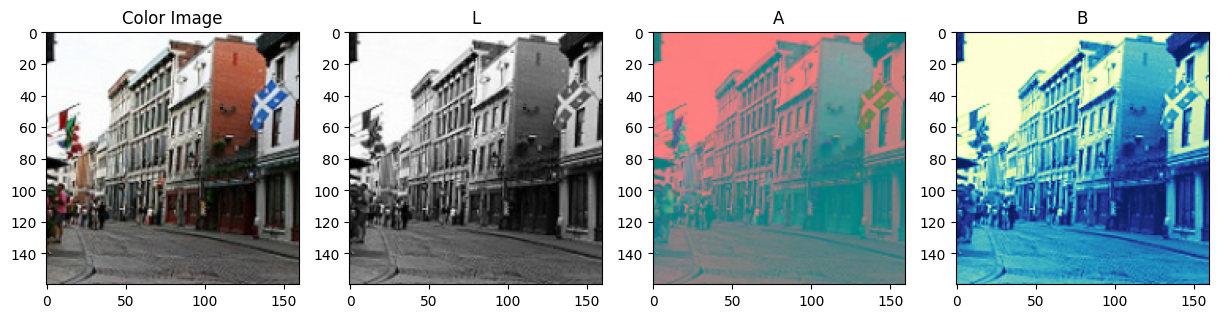

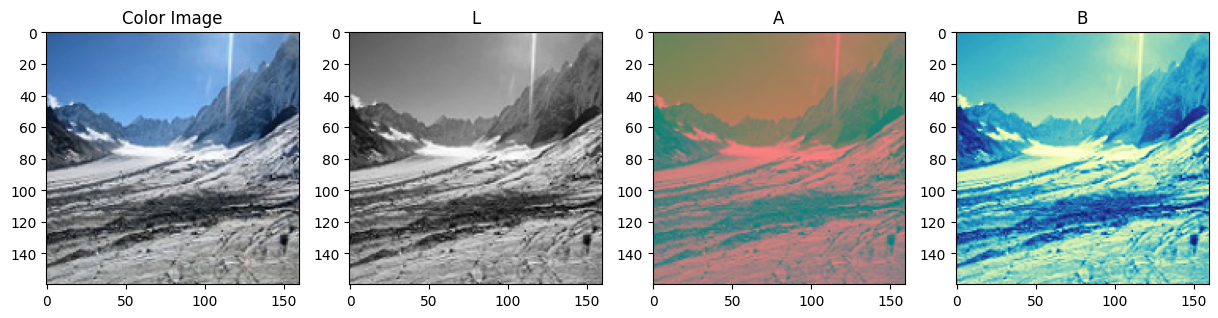

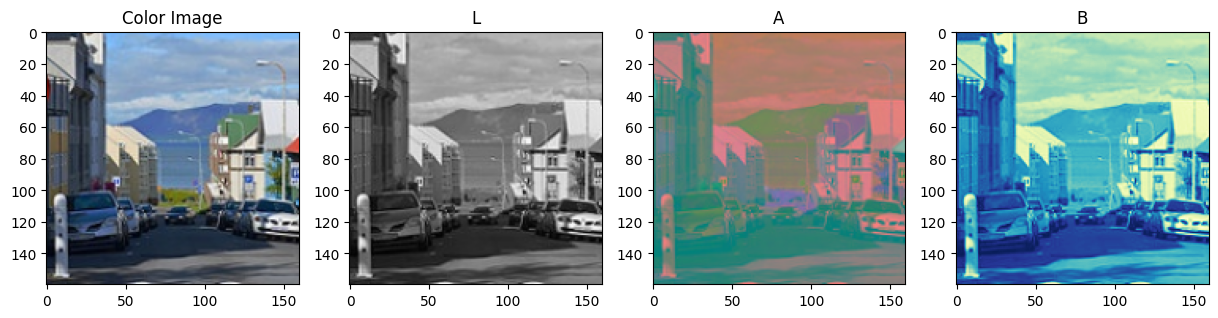

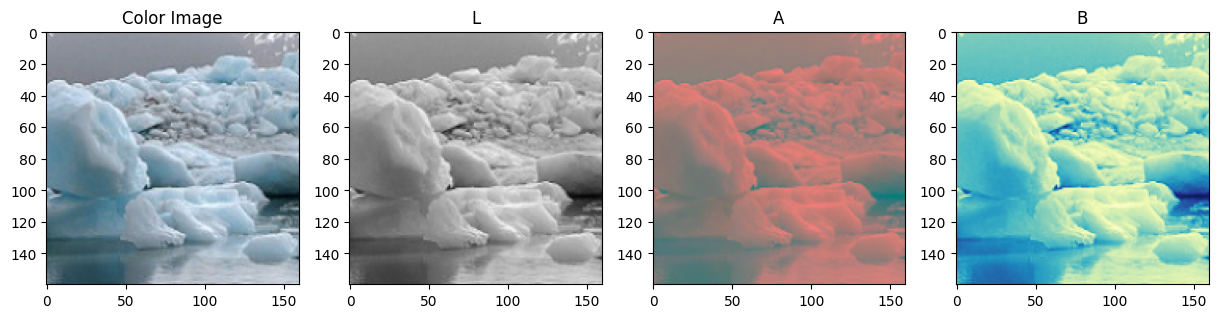

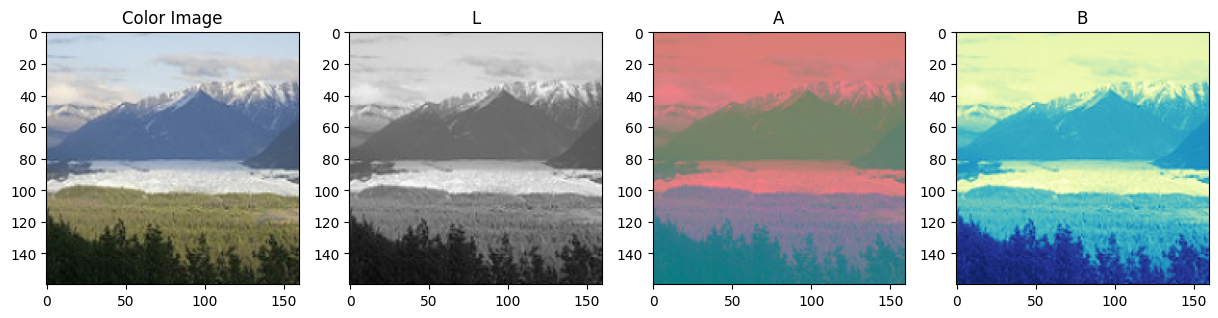

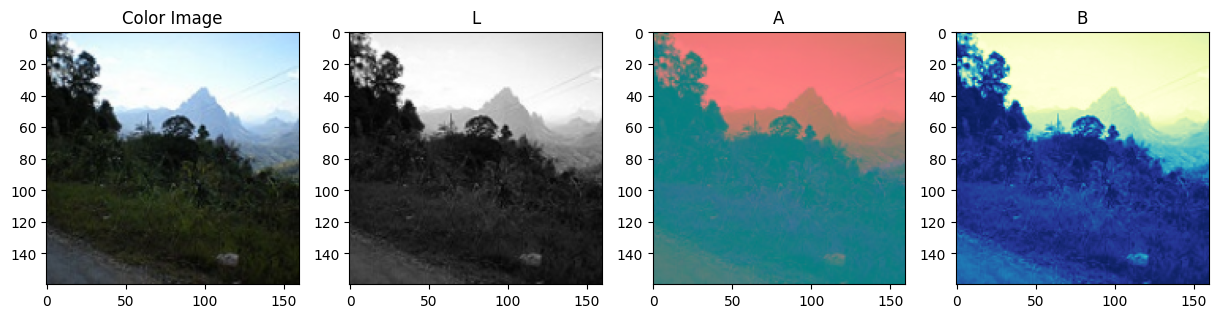

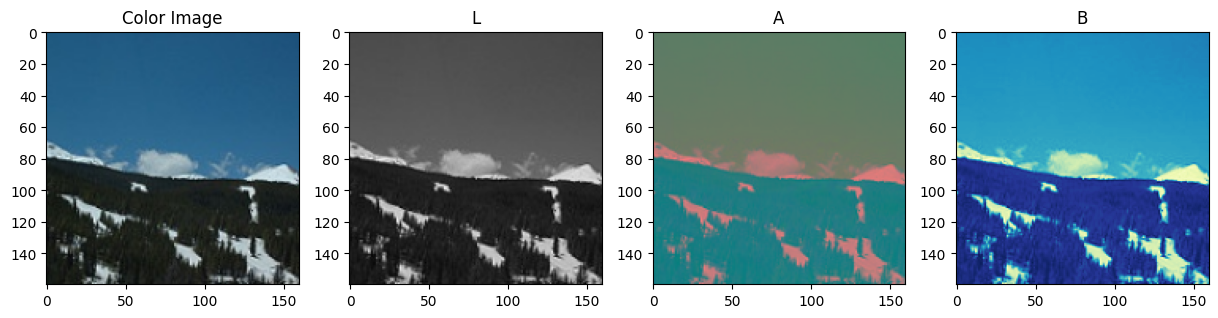

In [14]:
def plot_images(color,gray,lab):
  plt.figure(figsize=(15,15))
  plt.subplot(1,4,1)
  plt.title('Color Image')
  plt.imshow(color)
  plt.subplot(1,4,2)
  plt.title('L')
  plt.imshow(gray)
  plt.subplot(1,4,3)
  plt.title('A')
  plt.imshow(lab, cmap='RdYlGn_r')
  plt.subplot(1,4,4)
  plt.title('B')
  plt.imshow(lab[:,:,0], cmap='YlGnBu_r')

  plt.show()

for i in range(3,10):
     plot_images(color_img[i],gray_img[i],lab_img[i])






In [10]:
#defining models
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential

In [22]:
model1 = Sequential()



model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(160, 160, 1)))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model1.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))



model1.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model1.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model1.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model1.add(UpSampling2D((2, 2)))

model1.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])

model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 80, 80, 64)        640       
                                                                 
 conv2d_14 (Conv2D)          (None, 80, 80, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 40, 40, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 40, 40, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 256)       590080    
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 20, 512)       1180160   
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 20, 512)      

In [23]:
%%time
from keras.callbacks import EarlyStopping, ModelCheckpoint

# callbacks
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

model1.fit(X, Y, validation_split=0.15, epochs=300, batch_size=30, callbacks=[early_stopping, model_checkpoint])


Epoch 1/300
142/142 [==============================] - 21s 121ms/step - loss: 0.0399 - accuracy: 0.5279 - val_loss: 0.0116 - val_accuracy: 0.5915
Epoch 2/300
142/142 [==============================] - 17s 116ms/step - loss: 0.0124 - accuracy: 0.5435 - val_loss: 0.0122 - val_accuracy: 0.5076
Epoch 3/300
142/142 [==============================] - 17s 117ms/step - loss: 0.0123 - accuracy: 0.5471 - val_loss: 0.0122 - val_accuracy: 0.5154
Epoch 4/300
142/142 [==============================] - 17s 119ms/step - loss: 0.0110 - accuracy: 0.6448 - val_loss: 0.0103 - val_accuracy: 0.6542
Epoch 5/300
142/142 [==============================] - 17s 121ms/step - loss: 0.0102 - accuracy: 0.6739 - val_loss: 0.0100 - val_accuracy: 0.6565
Epoch 6/300
142/142 [==============================] - 17s 121ms/step - loss: 0.0101 - accuracy: 0.6752 - val_loss: 0.0100 - val_accuracy: 0.6716
Epoch 7/300
142/142 [==============================] - 17s 122ms/step - loss: 0.0099 - accuracy: 0.6779 - val_loss: 0.0098 -

1/1 [==============================] - 0s 152ms/step


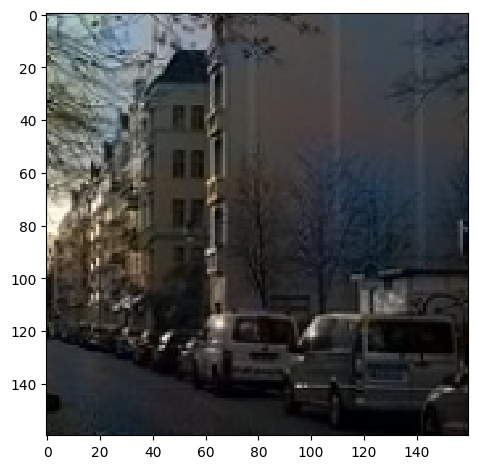

In [25]:
#which image to be resized and transformed
from skimage.transform import resize
from skimage.io import imsave, imshow
from tensorflow.keras.models import load_model

# Load the model
model = load_model('labmodel5k_callback.h5')

img1_color=[]

path_1 = '/kaggle/input/landscape/landscape Images/gray/0.jpg'

img1=img_to_array(load_img(path_1))

img1 = resize(img1 ,(160,160))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((160, 160, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))



In [24]:
model.save("labmodel5k_callback.h5")